In [63]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from skimage import segmentation, color
from skimage.future import graph
from skimage.segmentation import quickshift

100
flower_segmentation/images/image_00297.jpg
(511, 500, 3)
(511, 500, 3)
491942.0 782463.0
0.6287096003261496


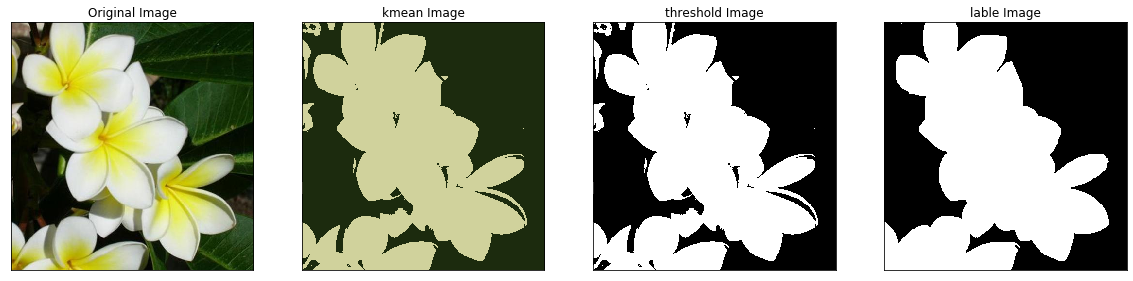

In [93]:
#img = cv2.cvtColor(cv2.imread('flower_segmentation/images/image_00017.jpg'), cv2.COLOR_BGR2GRAY)

imagesToSeg = [file for file in glob.glob("flower_segmentation/images/*.jpg")]
imagesToTest = [file for file in glob.glob("flower_segmentation/segmentation/*.png")]


print(len(imagesToSeg))
print((imagesToSeg[0]))
img = cv2.cvtColor(cv2.imread(imagesToSeg[3]),cv2.COLOR_BGR2RGB)
seg = cv2.cvtColor(cv2.imread(imagesToTest[3]),cv2.COLOR_BGR2RGB)
print(img.shape)
print(seg.shape)



Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
out = center[label.flatten()]
out = out.reshape((img.shape))
ret,thresh1 = cv2.threshold(out,127,255,cv2.THRESH_BINARY)

countOfIntercept = 0
 
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #print(thresh1[i][j][1])
        if thresh1[i][j][1] == seg[i][j][1]:
            countOfIntercept = countOfIntercept+1
            
            
print(countOfIntercept*2.0, ((np.sum(seg)/255) + (np.sum(thresh1)/255)))        
dice = countOfIntercept*2.0 / ((np.sum(seg)/255) + (np.sum(thresh1)/255)) #higher the better
        
print(dice)

plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(out)
plt.title("kmean Image"), plt.xticks([]), plt.yticks([])
plt.subplot(143)
plt.imshow(thresh1)
plt.title("threshold Image"), plt.xticks([]), plt.yticks([])
plt.subplot(144)
plt.imshow(seg)
plt.title("lable Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [69]:
imagesToSeg = [cv2.imread(file) for file in glob.glob("flower_segmentation/images/*.jpg")]
print(len(imagesToSeg))
#print(imagesToSeg[0])

100
